## CS 6120: Natural Language Processing - Prof. Ahmad Uzair

### Assignment 1: Naive Bayes
### Total Points: 100

In this assignment, you would be working with SMS data that contains SPAM or HAM messages. When you take a look at your gmail account, you find that a few mails are classified as spam. Similarly, some text messages that are received on the phone are also classified as spam based on a set of characteristics such as wording and so on. 

Therefore, we are going to address this problem of detecting SPAM or HAM messages with the help of Naive Bayes algorithm.

## Importing the Libraries

In [88]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings("ignore")

## Reading the data

When reading the data, ensure that the '.csv' file is in the same location where your jupyter notebook is used. This way the files are organized and easy to read using the pandas library. 

In [89]:
df = pd.read_csv('spam.csv', sep = ',', encoding = 'latin-1', usecols = lambda col: col not in ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])

In [90]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [91]:
df = df.rename(columns = {"v1": "spam_or_ham", "v2": "message"})

In [92]:
df.head()

,spam_or_ham,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

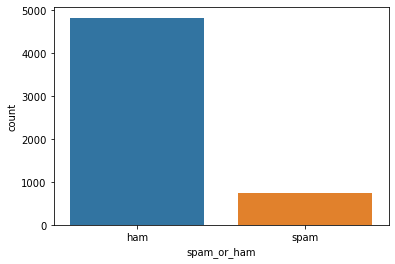

In [94]:
sns.countplot(df['spam_or_ham'])
plt.show()

## Upsampling the minority class: (5 points)

It is known that Naive bayes is not robust to class imbalance. It could be seen above that the data is quite imbalanced. Therefore, class balancing must be done before giving it to the Naive Bayes model for prediction. 

Feel free to use 'resample' library from sklearn. 

In [95]:
## hint: use resample from sklearn.utils
from sklearn.utils import resample

df_majority = df[df.spam_or_ham == 'ham']
df_minority = df[df.spam_or_ham == 'spam']

spam_upsample = resample(df_minority, replace = True, 
                        n_samples = df_majority.shape[0],
                        random_state = 101)

df_upsampled = pd.concat([df_majority, spam_upsample])
df_upsampled = df_upsampled.sample(frac = 1)

In [98]:
df_upsampled.head()

,spam_or_ham,message
3022,ham,You are a very very very very bad girl. Or lady.
3270,spam,You have 1 new voicemail. Please call 08719181...
4194,spam,Double mins and txts 4 6months FREE Bluetooth ...
2841,ham,aathi..where are you dear..
5066,spam,83039 62735=å£450 UK Break AccommodationVouche...


In [99]:
# TASK CELL

def clean_tweet(tweet):
    '''
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    '''
    stemmer = PorterStemmer()
    english_stopwords = stopwords.words('english')
    tweet = re.sub(r'\$\w*', '', tweet)
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for text in tweet:
        if text in punc:
            tweet = tweet.replace(text, "")
    tweet_tokens = word_tokenize(tweet)

    tweets_cleaned = []
    for word in tweet_tokens:
        if (word not in english_stopwords):  # remove stopwords
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_cleaned.append(stem_word)

    return tweets_cleaned

In [100]:
# TASK CELL
def find(frequency, word, label):
    '''
    Params:
        frequency: a dictionary with the frequency of each pair (or tuple)
        word: the word to look up
        label: the label corresponding to the word
    Return:
        n: the number of times the word with its corresponding label appears.
    '''
    n = 0  

    pair = (word, label)
    if (pair in frequency):
        n = frequency[pair]

    return n

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X = df['message']
y = df['spam_or_ham']

In [103]:
output_map = {'ham': 0, 'spam': 1}
y = y.map(output_map)

In [104]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: spam_or_ham, Length: 5572, dtype: int64

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [106]:
X_train.iloc[0]

'No did you check? I got his detailed message now'

In [107]:
custom_tweet = X_train.iloc[0]

# print cleaned tweet
print(clean_tweet(custom_tweet))

['no', 'check', 'i', 'got', 'detail', 'messag']


In [108]:
# TASK CELL
def tweet_counter(output, tweets, tweet_senti):
    '''
    Params:
        output: a dictionary that will be used to map each pair to its frequency
        tweets: a list of tweets
        tweet_senti: a list corresponding to the sentiment of each tweet (either 0 or 1)
    Return:
        output: a dictionary mapping each pair to its frequency
    '''


    for label, tweet in zip(tweet_senti, tweets):
        for word in clean_tweet(tweet):
            # define the key, which is the word and label tuple
            tweet_and_label = (word,label)

            # if the key exists in the dictionary, increment the count
            if tweet_and_label in output:
                output[tweet_and_label] += 1

            # else, if the key is new, add it to the dictionary and set the count to 1
            else:
                output[tweet_and_label] = 1


    return output

In [109]:
# Testing your function


result = {}
tweets = ['get offer upto 20%', 'I am coming now', 'Click on the link', 'get a latest car', 'canvas class scheduled']
ys = [1, 0, 1, 1, 0]
tweet_counter(result, tweets, ys)

{('get', 1): 2,
 ('offer', 1): 1,
 ('upto', 1): 1,
 ('20', 1): 1,
 ('i', 0): 1,
 ('come', 0): 1,
 ('click', 1): 1,
 ('link', 1): 1,
 ('latest', 1): 1,
 ('car', 1): 1,
 ('canva', 0): 1,
 ('class', 0): 1,
 ('schedul', 0): 1}

In [110]:
# Build the freqs dictionary for later uses

freqs = tweet_counter({}, X_train, y_train)

In [111]:
freqs

{('no', 0): 116,
 ('check', 0): 38,
 ('i', 0): 1160,
 ('got', 0): 191,
 ('detail', 0): 18,
 ('messag', 0): 53,
 ('for', 0): 18,
 ('love', 0): 183,
 ('start', 0): 49,
 ('attractioni', 0): 1,
 ('feel', 0): 72,
 ('need', 0): 148,
 ('everi', 0): 35,
 ('time', 0): 167,
 ('around', 0): 51,
 ('mesh', 0): 1,
 ('first', 0): 45,
 ('thing', 0): 94,
 ('come', 0): 231,
 ('thoughtsi', 0): 1,
 ('would', 0): 63,
 ('day', 0): 164,
 ('end', 0): 35,
 ('hersh', 0): 1,
 ('dreamlov', 0): 1,
 ('breath', 0): 3,
 ('namemi', 0): 1,
 ('life', 0): 59,
 ('happen', 0): 40,
 ('hermi', 0): 1,
 ('name', 0): 22,
 ('heri', 0): 2,
 ('cri', 0): 5,
 ('herwil', 0): 1,
 ('give', 0): 81,
 ('happi', 0): 95,
 ('take', 0): 114,
 ('sorrowsi', 0): 1,
 ('readi', 0): 29,
 ('fight', 0): 11,
 ('anyon', 0): 14,
 ('craziest', 0): 2,
 ('herlov', 0): 2,
 ('dont', 0): 212,
 ('proov', 0): 1,
 ('girl', 0): 31,
 ('beauti', 0): 19,
 ('ladi', 0): 7,
 ('whole', 0): 12,
 ('planeti', 0): 1,
 ('alway', 0): 43,
 ('sing', 0): 5,
 ('prais', 0): 1,
 ('

In [112]:
def train_naive_bayes(freqs, train_x, train_y):
    '''
    Input:
        freqs: dictionary from (word, label) to how often the word appears
        train_x: a list of tweets
        train_y: a list of labels correponding to the tweets (0,1)
    Output:
        logprior: the log prior. (equation 3 above)
        loglikelihood: the log likelihood of you Naive bayes equation. (equation 6 above)
    '''
    loglikelihood = {}
    logprior = 0

    

    # calculate V, the number of unique words in the vocabulary
    vocab = set([pair[0] for pair in freqs.keys()])
    V = len(vocab)

    # calculate num_pos and num_neg
    num_pos = num_neg = 0
    for pair in freqs.keys():
        # if the label is positive (greater than zero)
        if pair[1] > 0:

            # Increment the number of positive words by the count for this (word, label) pair
            num_pos += freqs[pair]

        # else, the label is negative
        else:

            # increment the number of negative words by the count for this (word,label) pair
            num_neg += freqs[pair]

    # Calculate D, the number of documents
    num_doc = len(train_y)

    # Calculate pos_num_docs, the number of positive documents (*hint: use sum(<np_array>))
    pos_num_docs = (len(list(filter(lambda x: x > 0, train_y))))

    # Calculate neg_num_docs, the number of negative documents (*hint: compute using D and pos_num_docs)
    neg_num_docs = (len(list(filter(lambda x: x <= 0, train_y))))

    # Calculate logprior
    logprior = np.log(pos_num_docs) - np.log(neg_num_docs)

    # For each word in the vocabulary...
    for word in vocab:
        # get the positive and negative frequency of the word
        freq_pos = find(freqs,word,1)
        freq_neg = find(freqs,word,0)

        # calculate the probability that each word is positive, and negative
        p_w_pos = (freq_pos + 1) / (num_pos + V)
        p_w_neg = (freq_neg + 1) / (num_neg + V)

        # calculate the log likelihood of the word
        loglikelihood[word] = np.log(p_w_pos/p_w_neg)



    return logprior, loglikelihood


In [113]:

# You do not have to input any code in this cell, but it is relevant to grading, so please do not change anything
logprior, loglikelihood = train_naive_bayes(freqs, X_train, y_train)
print(logprior)
print(len(loglikelihood))

-1.8434905440756992
7262


In [114]:
# TASK 4 CELL

def naive_bayes_predict(tweet, logprior, loglikelihood):
    '''
    Params:
        tweet: a string
        logprior: a number
        loglikelihood: a dictionary of words mapping to numbers
    Return:
        total_prob: the sum of all the logliklihoods of each word in the tweet (if found in the dictionary) + logprior (a number)

    '''
    
    # process the tweet to get a list of words
    word_l = clean_tweet(tweet)

    # initialize probability to zero
    total_prob = 0

    # add the logprior
    total_prob += logprior

    for word in word_l:

        # check if the word exists in the loglikelihood dictionary
        if word in loglikelihood:
            # add the log likelihood of that word to the probability
            total_prob += loglikelihood[word]



    return total_prob

In [115]:
# You do not have to input any code in this cell, but it is relevant to grading, so please do not change anything

# Experiment with your own tweet.
my_tweet = 'She smiled.'
p = naive_bayes_predict(my_tweet, logprior, loglikelihood)
print('The expected output is', p)

The expected output is -8.139492247399499


In [116]:
# UNQ_C6 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def test_naive_bayes(test_x, test_y, logprior, loglikelihood):
    """
    Input:
        test_x: A list of tweets
        test_y: the corresponding labels for the list of tweets
        logprior: the logprior
        loglikelihood: a dictionary with the loglikelihoods for each word
    Output:
        accuracy: (# of tweets classified correctly)/(total # of tweets)
    """
    accuracy = 0  # return this properly

    
    y_hats = []
    for tweet in test_x:
        # if the prediction is > 0
        if naive_bayes_predict(tweet, logprior, loglikelihood) > 0:
            # the predicted class is 1
            y_hat_i = 1
        else:
            # otherwise the predicted class is 0
            y_hat_i = 0

        # append the predicted class to the list y_hats
        y_hats.append(y_hat_i)

    # error is the average of the absolute values of the differences between y_hats and test_y
    error = np.mean(np.absolute(y_hats-test_y))

    # Accuracy is 1 minus the error
    accuracy = 1-error



    return accuracy


In [117]:
# For grading purpose only
# You do not have to input any code in this cell, but it is relevant to grading, so please do not change anything

# Run this cell to test your function
for tweet in ['I am happy', 'I am bad', 'this movie should have been great.', 'great', 'great great', 'great great great', 'great great great great']:
    # print( '%s -> %f' % (tweet, naive_bayes_predict(tweet, logprior, loglikelihood)))
    p = naive_bayes_predict(tweet, logprior, loglikelihood)
#     print(f'{tweet} -> {p:.2f} ({p_category})')
    print(f'{tweet} -> {p:.2f}')

I am happy -> -7.59
I am bad -> -6.28
this movie should have been great. -> -4.07
great -> -2.95
great great -> -4.07
great great great -> -5.18
great great great great -> -6.29


In [118]:
# Feel free to check the sentiment of your own tweet below
my_tweet = 'you are bad :('
naive_bayes_predict(my_tweet, logprior, loglikelihood)

-3.535091004750317

## Theory Questions: (15 points)

1. When performing Naive Bayes operation especially for text classification, why is there a requirement for Laplace Smoothing or Additive Smoothing? Explain with considering an example of training and the test set and show how not having additive smoothing leads to undesirable outcomes. (10 points)


2. Why are logarithmic values computed for naive bayes algorithm rather than only the probability values? (5 points)